# Lab 2:  Manipulating data frames

In this lab, we will learn some common methods for manipulating DataFrames:
   * *slice*: extract part of a DataFrame
   * *sort*: sort the rows of a DataFrame by one of the columns
   * *group*: combine rows in a DataFrame in a calculation
   
Two other manipulation techniques which we are *not* covering are:
   * *pivot*:  rearrange the DataFrame
   * *join*:  attach two or more DataFrames together into a single DataFrame

### Section 1:  Loading the data

This lab explores the FBI NICS Firearms Background Check data, which records the number of background check made.  A background check must be made prior to *some* sales of firearms (a big exception is private sales.)  This data is often used as the best approximation of total gun sales at a given time.

BuzzFeed converts the PDF data supplied by the FBI to CSV files.

For more information on the dataset: [https://github.com/BuzzFeedNews/nics-firearm-background-checks](https://github.com/BuzzFeedNews/nics-firearm-background-checks)

For a direct link to the dataset:  [https://raw.githubusercontent.com/BuzzFeedNews/nics-firearm-background-checks/master/data/nics-firearm-background-checks.csv](https://raw.githubusercontent.com/BuzzFeedNews/nics-firearm-background-checks/master/data/nics-firearm-background-checks.csv)

Import the necessary libraries:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Our data set has a lot of columns, so the following code ensures they are all displayed.

In [2]:
pd.set_option('display.max_columns', None)

Read the CSV file into a dataframe called `guns`, and display the dataframe to make sure it was loaded correctly.

In [14]:
guns = pd.read_csv("https://raw.githubusercontent.com/BuzzFeedNews/nics-firearm-background-checks/master/data/nics-firearm-background-checks.csv")

In [15]:
guns.head(1)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2022-01,Alabama,26820.0,499.0,17571.0,12669.0,1524.0,880,0.0,14.0,4.0,0.0,1822.0,859.0,12.0,30.0,0.0,0.0,0.0,0.0,21.0,24.0,13.0,1.0,1.0,0.0,62764


Convert the type of the `month` column into a `datetime` object, and display `guns` to make sure it was successful.

In [16]:
guns['month'] = pd.to_datetime(guns['month'])

In [17]:
guns.head(1)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2022-01-01,Alabama,26820.0,499.0,17571.0,12669.0,1524.0,880,0.0,14.0,4.0,0.0,1822.0,859.0,12.0,30.0,0.0,0.0,0.0,0.0,21.0,24.0,13.0,1.0,1.0,0.0,62764


There was no day in the original `month` column.  What happens to the day once we convert this column into a `datetime` object? **The day is displayed again.**

### Section 2: Slicing

*Slicing* means accessing or extracting part of a DataFrame.  We have actually already used slicing.  For example, what does the code below get from the DataFrame? 

In [18]:
guns["handgun"]

0        17571.0
1         2248.0
2        18333.0
3         6355.0
4        36971.0
          ...   
15340       14.0
15341       65.0
15342      149.0
15343       25.0
15344       45.0
Name: handgun, Length: 15345, dtype: float64

We can extract multiple columns by putting them in a list.  For example, to get the hand gun and long gun permit check columns.

In [19]:
guns[['handgun',"long_gun"]]

,handgun,long_gun
0,17571.0,12669.0
1,2248.0,1872.0
2,18333.0,8655.0
3,6355.0,5674.0
4,36971.0,24010.0
...,...,...
15340,14.0,2.0
15341,65.0,286.0
15342,149.0,251.0
15343,25.0,214.0


We can also access a specific row (or rows) and column (or columns) using the `.loc[]` command.  Run the following code.

In [20]:
guns.loc[2,"long_gun"]

8655.0

What number did it extract from the dataframe?  Does the 2 make sense for the row information?

The two coordinates for `.loc` are always the row or rows, then the column or columns, in that order.  The 2 is the *row index* or row number (shown on the very left when the `guns` DataFrame is displayed).  It corresponds to the *third* row in the DataFrame because the row index begins at 0.  That is, the first row in the DataFrame has index 0, the second row has index 1, etc.  Python and many other programming languages start counting with 0.

Use `.loc` to extract the state at row index 15.

In [21]:
guns.loc[15,'state']

'Indiana'

Is this the 16th state alphabetically? (16th since the row index begins at 0)  Why or why not?

To get a range of consecutive rows we use the pattern first_row_index:last_row_index.  Just using a : by itself will get either all rows or all columns, depending on whether it is used first or second, respectively.  For example, the following code gets all columns for rows with indices between 10 and 20 inclusive.

In [22]:
guns.loc[10:20,:]

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
10,2022-01-01,Georgia,19849.0,0.0,15651.0,8724.0,927.0,711,3.0,15.0,7.0,0.0,1489.0,624.0,10.0,37.0,0.0,0.0,0.0,0.0,11.0,4.0,0.0,0.0,0.0,0.0,48062
11,2022-01-01,Guam,0.0,0.0,162.0,83.0,17.0,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275
12,2022-01-01,Hawaii,1352.0,2.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1358
13,2022-01-01,Idaho,4785.0,2.0,5360.0,4418.0,593.0,255,0.0,3.0,1.0,0.0,238.0,208.0,3.0,32.0,11.0,0.0,0.0,0.0,17.0,20.0,1.0,0.0,0.0,0.0,15947
14,2022-01-01,Illinois,440424.0,0.0,22564.0,9950.0,1015.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,473953
15,2022-01-01,Indiana,1287.0,72093.0,21402.0,12343.0,2205.0,921,2.0,2.0,3.0,1.0,630.0,266.0,16.0,48.0,4.0,0.0,0.0,0.0,41.0,55.0,11.0,2.0,1.0,0.0,111333
16,2022-01-01,Iowa,5661.0,11306.0,2307.0,2377.0,171.0,67,11.0,0.0,0.0,1.0,14.0,16.0,0.0,53.0,18.0,3.0,0.0,0.0,2.0,3.0,1.0,0.0,0.0,0.0,22011
17,2022-01-01,Kansas,1123.0,7.0,6297.0,5293.0,779.0,394,0.0,5.0,2.0,0.0,427.0,221.0,5.0,51.0,14.0,2.0,0.0,0.0,5.0,1.0,4.0,0.0,0.0,0.0,14630
18,2022-01-01,Kentucky,657.0,333471.0,9894.0,7487.0,634.0,521,1.0,10.0,4.0,0.0,1211.0,621.0,3.0,20.0,1.0,0.0,0.0,0.0,27.0,28.0,3.0,2.0,0.0,0.0,354595
19,2022-01-01,Louisiana,4588.0,574.0,12253.0,7529.0,1007.0,541,0.0,11.0,5.0,0.0,790.0,426.0,11.0,0.0,0.0,0.0,0.0,0.0,17.0,13.0,3.0,0.0,0.0,0.0,27768


Can you figure out how to extract rows with indices 50 to 100 inclusive, and the `month`, `state` and `permit` columns?  

Hint: You can also use a list of columns with `.loc`.

In [34]:
guns.loc[50:100, ['month', 'state', 'permit']]

,month,state,permit
50,2022-01-01,Virginia,321.0
51,2022-01-01,Washington,15482.0
52,2022-01-01,West Virginia,1759.0
53,2022-01-01,Wisconsin,21156.0
54,2022-01-01,Wyoming,407.0
55,2021-12-01,Alabama,27674.0
56,2021-12-01,Alaska,41.0
57,2021-12-01,Arizona,3106.0
58,2021-12-01,Arkansas,2197.0
59,2021-12-01,California,15528.0


<details> <summary>Answer:</summary>
<code>
guns.loc[50:100,["month","state","permit"]]
</code>
</details>

### Section 3: Sorting

The following code sorts `guns` by the `state` column in ascending and stores the new DataFrame in the variable `sorted_guns`.

In [35]:
sorted_guns = guns.sort_values("state")
sorted_guns.head(10)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2022-01-01,Alabama,26820.0,499.0,17571.0,12669.0,1524.0,880,0.0,14.0,4.0,0.0,1822.0,859.0,12.0,30.0,0.0,0.0,0.0,0.0,21.0,24.0,13.0,1.0,1.0,0.0,62764
6160,2012-09-01,Alabama,421.0,NaN,10831.0,12511.0,318.0,577,0.0,11.0,11.0,0.0,1764.0,1936.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28384
2585,2018-02-01,Alabama,24547.0,0.0,9220.0,7172.0,353.0,490,0.0,15.0,15.0,0.0,1778.0,1502.0,4.0,0.0,0.0,0.0,0.0,0.0,29.0,39.0,4.0,0.0,1.0,2.0,45171
12760,2002-09-01,Alabama,0.0,NaN,4762.0,9589.0,NaN,301,0.0,72.0,68.0,NaN,1292.0,1877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17961
10835,2005-08-01,Alabama,0.0,NaN,5407.0,7212.0,NaN,259,0.0,30.0,40.0,NaN,1153.0,1437.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15538
1155,2020-04-01,Alabama,21276.0,386.0,28951.0,12512.0,1455.0,1272,0.0,27.0,27.0,0.0,3089.0,1632.0,16.0,37.0,0.0,0.0,0.0,0.0,31.0,30.0,7.0,0.0,0.0,0.0,70748
14190,2000-07-01,Alabama,2.0,NaN,5508.0,6730.0,NaN,211,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12451
14850,1999-07-01,Alabama,0.0,NaN,6770.0,7813.0,NaN,212,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14795
9185,2008-02-01,Alabama,0.0,NaN,10248.0,11972.0,NaN,470,0.0,18.0,18.0,NaN,1682.0,2157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26565
13310,2001-11-01,Alabama,0.0,NaN,5948.0,17304.0,NaN,398,0.0,76.0,119.0,NaN,1312.0,2892.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28049


The original DataFrame was sorted by `month` (the date) first, then the state.  Is this DataFrame sorted by `state`, then `month`?

To sort by two or more columns, pass in a list of the columns in the order you want to sort by (ex. the first column will take priority in the sort, then the second column, etc.).

In [36]:
sorted_guns2 = guns.sort_values(["state","month"])
sorted_guns2.head(10)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
15290,1998-11-01,Alabama,0.0,NaN,449.0,603.0,NaN,10,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1062
15235,1998-12-01,Alabama,0.0,NaN,10118.0,25120.0,NaN,268,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35506
15180,1999-01-01,Alabama,0.0,NaN,7516.0,10311.0,NaN,222,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18049
15125,1999-02-01,Alabama,0.0,NaN,9630.0,10654.0,NaN,299,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20583
15070,1999-03-01,Alabama,0.0,NaN,9151.0,9991.0,NaN,282,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19424
15015,1999-04-01,Alabama,0.0,NaN,7371.0,7218.0,NaN,234,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14823
14960,1999-05-01,Alabama,0.0,NaN,7005.0,6832.0,NaN,206,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14043
14905,1999-06-01,Alabama,0.0,NaN,7010.0,7393.0,NaN,248,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14651
14850,1999-07-01,Alabama,0.0,NaN,6770.0,7813.0,NaN,212,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14795
14795,1999-08-01,Alabama,0.0,NaN,7123.0,9709.0,NaN,263,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17095


Repeat the code above, but add the parameter `ascending = False` to the function `sort_values()`.

In [37]:
sorted_guns2 = guns.sort_values(["state","month"], ascending=False)
sorted_guns2.head(10)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
54,2022-01-01,Wyoming,407.0,12.0,1967.0,1848.0,209.0,100,21.0,1.0,1.0,0.0,133.0,96.0,1.0,26.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,4827
109,2021-12-01,Wyoming,564.0,11.0,3605.0,3523.0,283.0,161,9.0,0.0,0.0,0.0,125.0,126.0,0.0,22.0,3.0,0.0,0.0,0.0,3.0,6.0,1.0,0.0,0.0,0.0,8442
164,2021-11-01,Wyoming,499.0,10.0,2816.0,3220.0,193.0,165,8.0,1.0,2.0,0.0,131.0,154.0,0.0,36.0,1.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,7241
219,2021-10-01,Wyoming,355.0,6.0,2127.0,2920.0,162.0,149,11.0,1.0,1.0,0.0,126.0,151.0,3.0,9.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,6027
274,2021-09-01,Wyoming,539.0,18.0,2161.0,2747.0,170.0,179,15.0,1.0,3.0,0.0,121.0,143.0,0.0,28.0,1.0,0.0,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,6136
329,2021-08-01,Wyoming,575.0,1.0,2208.0,2442.0,160.0,130,33.0,2.0,2.0,0.0,116.0,167.0,3.0,23.0,1.0,0.0,0.0,0.0,4.0,3.0,1.0,0.0,0.0,0.0,5871
384,2021-07-01,Wyoming,842.0,17.0,2134.0,2126.0,159.0,120,20.0,1.0,3.0,0.0,137.0,104.0,3.0,28.0,2.0,0.0,0.0,0.0,4.0,6.0,0.0,0.0,0.0,0.0,5706
439,2021-06-01,Wyoming,1203.0,17.0,2071.0,2057.0,156.0,114,17.0,8.0,4.0,0.0,123.0,151.0,2.0,28.0,4.0,0.0,0.0,0.0,6.0,1.0,1.0,0.0,0.0,0.0,5963
494,2021-05-01,Wyoming,1022.0,25.0,2587.0,2200.0,207.0,129,2.0,0.0,3.0,0.0,81.0,92.0,4.0,19.0,1.0,0.0,0.0,0.0,2.0,6.0,0.0,1.0,0.0,0.0,6381
549,2021-04-01,Wyoming,511.0,34.0,3443.0,3105.0,296.0,180,0.0,0.0,0.0,0.0,119.0,138.0,2.0,16.0,5.0,0.0,0.0,0.0,5.0,6.0,1.0,0.0,0.0,0.0,7861


<details> <summary>Answer:</summary>
<code>
sorted_guns3 = guns.sort_values(["state","month"], ascending = False)
sorted_guns3.head(10)
</code>
</details>

What do you think this parameter does?

### Section 4: Grouping

What if we wanted to find the mean number of handgun checks for each state?  Our usual method of filtering would take a while.  Instead we will use the *group by* process, which:
- *splits* the data into groups based on some criteria
- *applies* a function to each group independently
- *combines* the results into a data structure

The splitting step is done by the function `groupby()` and a second function, like `mean()`, is applied to the groups.

In [38]:
guns.groupby("state").mean()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
state,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,9159.684588,295.847222,11330.734767,11824.652330,624.460526,533.243728,0.118280,22.020492,28.967213,0.737931,1648.676230,1658.528689,6.200000,7.336957,0.010989,0.000000,0.014286,0.000000,16.715686,13.833333,2.774510,0.484536,0.676471,0.215054,36220.605735
Alaska,86.268817,15.541667,2137.136201,2595.369176,224.723684,143.774194,0.068100,4.553279,6.180328,0.048276,163.065574,180.020492,0.979310,25.130435,19.010989,0.164706,0.000000,0.000000,8.754902,9.980392,0.862745,0.123711,0.117647,0.021505,5420.820789
Arizona,3798.598566,567.833333,9892.738351,7127.103943,925.907895,538.275986,23.810036,8.323770,4.950820,0.648276,989.672131,577.549180,4.034483,101.826087,9.736264,0.576471,0.000000,0.000000,13.460784,8.401961,1.774510,0.402062,0.450980,0.096774,23462.068100
Arkansas,2520.810036,735.875000,4909.035842,7289.272401,235.250000,305.293907,11.684588,9.372951,19.192623,0.289655,841.450820,1765.491803,2.206897,0.000000,0.000000,0.000000,0.014286,0.000000,8.294118,9.754902,1.196078,0.309278,0.411765,0.118280,17667.688172
California,29419.146953,2082.708333,29325.580645,26702.817204,4011.723684,745.032258,121.885305,0.139344,0.065574,0.006897,258.540984,202.790984,8.131034,208.206522,113.868132,18.176471,0.000000,0.000000,975.794118,401.470588,79.901961,5.917526,2.725490,0.064516,90092.537634
Colorado,3074.939068,3.611111,13084.376344,12481.978495,989.157895,1382.437276,10.503597,0.155738,0.073770,0.000000,0.336066,0.340164,0.000000,219.489130,41.285714,1.341176,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30661.068100
Connecticut,7182.741935,341.194444,4239.168459,2682.111111,495.381579,28.759857,104.254480,0.000000,0.000000,0.427586,0.004098,0.000000,0.000000,0.010870,0.000000,0.000000,0.000000,0.000000,30.450980,9.588235,4.656863,0.422680,0.245098,0.053763,14611.795699
Delaware,154.146953,0.000000,1196.275986,1183.745520,94.421053,50.240143,0.182796,0.549180,0.594262,0.062069,8.118852,5.991803,0.641379,33.282609,0.000000,0.094118,0.000000,0.000000,49.274510,21.941176,3.117647,0.773196,0.450980,0.032258,2688.362007
District of Columbia,86.344086,0.013889,54.917563,3.143369,0.013158,0.415771,0.258065,0.000000,0.000000,0.000000,0.012346,0.000000,0.000000,0.293478,0.098901,10.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,148.279570


If we only wanted to see the `handgun` column, we can use:


In [39]:
guns.groupby("state").mean()["handgun"]

state
Alabama                 11330.734767
Alaska                   2137.136201
Arizona                  9892.738351
Arkansas                 4909.035842
California              29325.580645
Colorado                13084.376344
Connecticut              4239.168459
Delaware                 1196.275986
District of Columbia       54.917563
Florida                 33132.329749
Georgia                 11305.372760
Guam                       56.125448
Hawaii                      0.010753
Idaho                    2783.168459
Illinois                13452.612903
Indiana                 12193.501792
Iowa                      173.913978
Kansas                   4693.215054
Kentucky                 8754.039427
Louisiana                8994.724014
Maine                    2310.462366
Mariana Islands             2.903704
Maryland                 3295.211470
Massachusetts            3405.225806
Michigan                 7177.584229
Minnesota                6310.831541
Mississippi              6254.57

Other functions we can use with `groupby()` are:
- `mean()` : Compute mean of each group
- `median()` : Compute median of each group
- `sum()` : Compute sum of values in each group
- `size()` : Compute size (including `NaN` values) of each group
- `count()` : Compute count (not including `NaN` values) of each group
- `std()` : Standard deviation of each group
- `var()` : Compute variance of each group
- `describe()` : Generates descriptive statistics
- `min()` : Compute min of group values
- `max()` : Compute max of group values

For example, what is the standard deviation of long gun background checks in all states?

In [41]:
guns.groupby('state').std()['long_gun']

state
Alabama                  6407.966964
Alaska                    836.067488
Arizona                  2732.637571
Arkansas                 3601.763579
California              10856.871180
Colorado                 4240.092311
Connecticut              1592.693666
Delaware                  583.592591
District of Columbia       12.937073
Florida                  8534.694178
Georgia                  5157.124236
Guam                       24.838305
Hawaii                      1.697024
Idaho                    1530.098219
Illinois                 3968.339719
Indiana                  5071.979781
Iowa                     1653.430923
Kansas                   2390.794192
Kentucky                 4191.983834
Louisiana                5402.843112
Maine                    1431.619794
Mariana Islands             4.293496
Maryland                 2092.882709
Massachusetts            1044.784559
Michigan                 5822.054455
Minnesota                4173.099811
Mississippi              4514.85

<details> <summary>Answer:</summary>
<code>
guns.groupby("state").std()["long_gun"]
</code>
</details>

Notice that the output of `guns.groupby("state").mean()["handgun"]` looks a lot like the output of `value_counts()`.  We can use it to make a bar plot.  Try it below.

<AxesSubplot:xlabel='state'>

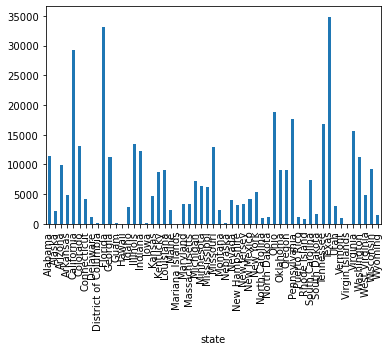

In [42]:
guns.groupby('state').mean()['handgun'].plot(kind="bar")

<details> <summary>Answer:</summary>
guns.groupby("state").mean()["handgun"].plot(kind = "bar")
</details>

Which state had the most background checks for handguns?

We can also use `groupby` for dates.  For example, to sum by month:

In [43]:
guns.groupby(guns["month"].dt.month).sum()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
month,,,,,,,,,,,,,,,,,,,,,,,,,
1,10962436.0,3752039.0,9935342.0,9414098.0,453311.0,391584,61064.0,6236.0,9379.0,315.0,524790.0,611241.0,2243.0,32704.0,7426.0,1196.0,66.0,50.0,28797.0,16272.0,3332.0,536.0,494.0,45.0,36214996
2,9659429.0,2976466.0,10312869.0,9426423.0,378903.0,456261,64674.0,6225.0,8998.0,272.0,668565.0,849307.0,1940.0,24633.0,5720.0,1006.0,46.0,55.0,22158.0,12869.0,2131.0,402.0,370.0,52.0,34879774
3,11316850.0,3590811.0,11439288.0,10529338.0,456461.0,460045,62400.0,6035.0,8309.0,309.0,512350.0,604174.0,1983.0,29839.0,7114.0,1189.0,57.0,58.0,25815.0,15774.0,2750.0,452.0,448.0,57.0,39071906
4,9809365.0,2871655.0,9168675.0,8478589.0,383167.0,372896,52547.0,5409.0,7314.0,297.0,438706.0,514534.0,1744.0,25637.0,6039.0,957.0,39.0,55.0,22349.0,13785.0,2358.0,437.0,404.0,62.0,32177020
5,9006241.0,3495609.0,8140833.0,7102673.0,335238.0,358237,50108.0,5201.0,6946.0,244.0,439342.0,485027.0,1574.0,26443.0,6175.0,859.0,42.0,37.0,20701.0,11440.0,1950.0,392.0,405.0,76.0,29495793
6,8849435.0,3515794.0,8357243.0,7165560.0,380294.0,369959,50022.0,5267.0,6941.0,248.0,455260.0,492513.0,1630.0,28031.0,6342.0,1091.0,38.0,42.0,21590.0,12755.0,2364.0,448.0,426.0,57.0,29723350
7,9002057.0,3009609.0,7971065.0,7185433.0,359915.0,334946,81661.0,5433.0,7216.0,243.0,469005.0,512220.0,1635.0,27960.0,6119.0,1509.0,35.0,28.0,19706.0,11270.0,2125.0,412.0,412.0,49.0,29010063
8,8837785.0,2634545.0,8270754.0,9335600.0,356633.0,339291,59170.0,5639.0,7669.0,224.0,495269.0,597920.0,1790.0,29773.0,6606.0,1748.0,49.0,40.0,20295.0,12590.0,2283.0,451.0,455.0,53.0,31016632
9,8491330.0,2382720.0,7865165.0,10443914.0,346140.0,337742,63558.0,5710.0,7575.0,223.0,497392.0,652382.0,1799.0,27704.0,6285.0,1579.0,51.0,45.0,20071.0,13428.0,2204.0,449.0,497.0,49.0,31168012


Can you make a bar chart of the number of handgun permit issued each month?

Hint 1:  You may want to save the above DataFrame in a variable first.

Hint 2:  You do not need to use `value_counts()` since the data is already grouped.  Instead, call the bar plot function on the `handgun` column.

Text(0, 0.5, '# of background checks')

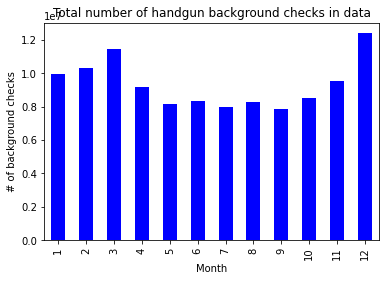

In [48]:
guns_grouped_by_month = guns.groupby(guns["month"].dt.month).sum()
guns_grouped_by_month["handgun"].plot(kind = "bar", color = "blue")
plt.title("Total number of handgun background checks in data")
plt.xlabel("Month")
plt.ylabel("# of background checks")

<details><summary>Answer:</summary>
    <code>
guns_grouped_by_month = guns.groupby(guns["month"].dt.month).sum()
guns_grouped_by_month["handgun"].plot(kind = "bar", color = "blue")
plt.title("Total number of handgun background checks in data")
plt.xlabel("Month")
plt.ylabel("# of background checks")
</code>
</details>

Which month had highest total number of background checks?  The lowest?

Let's plot the total number of background checks for both handguns and long guns on the same graph.  To do this, use the list `["handgun","long_gun"]` of the two columns instead of the just `"month"`

Text(0, 0.5, '# of background checks')

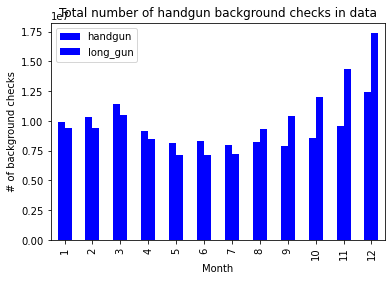

In [49]:
guns_grouped_by_month = guns.groupby(guns["month"].dt.month).sum()
guns_grouped_by_month[["handgun",'long_gun']].plot(kind = "bar", color = "blue")
plt.title("Total number of handgun background checks in data")
plt.xlabel("Month")
plt.ylabel("# of background checks")

<details><summary>Answer:</summary>
    <code>
guns_grouped_by_month[["handgun","long_gun"]].plot(kind = "bar")
plt.title("Total number of background checks in data")
plt.xlabel("Month")
plt.ylabel("# of background checks")
</code>
</details>

Are there any significant differences in background checks between handguns and long guns?  Why might this be?  (Hint:  hunting season is usually in the fall)

### Section 5:  Putting it all together

Suppose we want to make a line plot showing how the total number of background checks (`totals` column) has changed in New York state in the last 10 years (2010 - 2020). 

Creating this plot will involve several steps.  First think of what these steps are, and then think of what a logical order for them would be.  You may want to write or type up this list to keep track as you write the code for it.

<details><summary>One possible order</summary>
1. filter the DataFrame to make a new DataFrame with only data from 2010-2020 and New York state (this can also be done as two consecutive steps in either order)<br>
2. use `groupby()` to group by the months of each year and apply the `sum()` function<br>
3. make a line plot with the year on the x axis and totals on the y axis
</details>

Note that when you make the line plot, the year will be the row index as a result of using `groupby()`.  This just means it will automatically be used for the x axis in the line plot, and you do not have to pass it in as a parameter.

Now try writing this code without looking at any of the hints!  (But if you get stuck, they are there)

In [54]:
year_filter_lower = guns["month"].dt.year >= 2010
year_filter_upper = guns["month"].dt.year <= 2020
ny_filter = guns["state"] == "New York"

<details><summary>One way to do the filtering</summary>
<code>
year_filter_lower = guns["month"].dt.year >= 2010
year_filter_upper = guns["month"].dt.year <= 2020
ny_filter = guns["state"] == "New York"

guns2 = guns[year_filter_lower & year_filter_upper & ny_filter]
guns2
</code>
</details>

In [55]:
grouped_guns2 = ny_filter.groupby(ny_filter["month"].dt.year).sum()
grouped_guns2

KeyError: 'month'

<details><summary>Grouping, assuming the filtered DataFrame is `guns2`:</summary>
<code>
grouped_guns2 = guns2.groupby(guns2["month"].dt.year).sum()
grouped_guns2
</code>
</details>

In [ ]:
grouped_guns2.plot(y = "totals")
plt.title("Total background checks in New York state")
plt.xlabel("Year")
plt.ylabel("Number of checks")

<details><summary>Plotting, assuming the filtered and grouped DataFrame is `grouped_guns2`:</summary>
<code>
grouped_guns2.plot(y = "totals")
plt.title("Total background checks in New York state")
plt.xlabel("Year")
plt.ylabel("Number of checks")
</code>
</details>

How has the total number of background checks for guns in New York state changed from 2010-2020?

#### Optional challenge questions:
* Find the row with the highest total number of background checks.  <details><summary>Hint:</summary>
Use `idxmax()` from MAT 128 or mentioned last lab.
</details>
* Plot a histogram of the distribution over all states of the median number of long gun background checks made in May in the last five years.  That is, your histogram will contain one data point for each state, which is the median number of long gun background checks made in that state in the last 5 years.
* Plot the same histogram as the previous challenge, but for November.  How does it compare to the May histogram?  Does the shape of the distribution change or just the magnitude?